## Homework


The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

In [1]:
# Import data wrangling libraries
import pandas as pd
import datetime as dt

# Import visualisation libraries
import seaborn as sns
from matplotlib import pyplot as plt

# Import training libraries
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19


In [2]:
df = pd.read_parquet("./data/yellow_tripdata_2022-01.parquet")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [3]:
# Get info of the data
df.shape

# ANSWER:
# - 19 Columns 

(2463931, 19)

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45

In [4]:
# Get duration of trip in minutes
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["duration"] = df["duration"].dt.total_seconds() / 60

In [5]:
# Get Standard Deviation
df["duration"].std()

# ANSWER:
# - 46.45

46.44530513776802

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [6]:
# Get the number of records before removing the outliers
before_removal_outliers = df.shape[0]

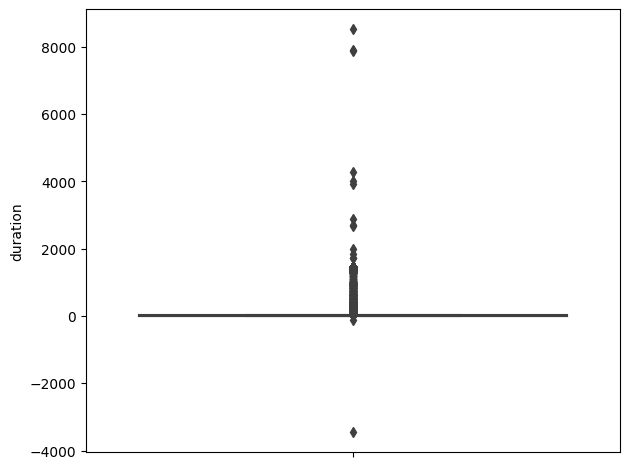

In [7]:
# Explore outliers of the "duration" column
sns.boxplot(y="duration", data=df)
plt.tight_layout()

# NOTE:
# Exercice suggests to keep only records with duration between 1 and 60 minutes (inclusive)

In [8]:
# Filter out outliers as per the exercice request and capture the number of records kept.
df = df[(df["duration"] >= 1) & (df["duration"] <= 60)]
after_removal_outliers = df.shape[0]

In [9]:
# Calculate percentage of records left
round((after_removal_outliers / before_removal_outliers) * 100)

# ANSWER:
# - 98% 

98

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [10]:
# Filter on columns for training and convert to dict for the DictVectorizer
train_dict = df[["PULocationID", "DOLocationID"]].to_dict(orient='records')

In [11]:
# Generate the train dataset
dict_vect = DictVectorizer()
X_train = dict_vect.fit_transform(train_dict)
y_train = df["duration"].values

In [12]:
X_train

# ANSWER:
# - 2

<2421440x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 6.99
* 11.99
* 16.99
* 21.99

In [13]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the train set
y_pred = lr.predict(X_train)

In [14]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"The RMSE is: {rmse:.2f}")

# ANSWER:
# - 6.99 (closest answer among the four)

The RMSE is: 8.92


## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79

In [15]:
# Read the validation dataset
val_df = pd.read_parquet("./data/yellow_tripdata_2022-02.parquet")
val_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [16]:
# Get duration of trip in minutes
val_df["duration"] = val_df["tpep_dropoff_datetime"] - val_df["tpep_pickup_datetime"]
val_df["duration"] = val_df["duration"].dt.total_seconds() / 60

# Create the test set in DictVectorizer ready for consumption
val_dict = val_df[["PULocationID", "DOLocationID"]].to_dict(orient='records')
val_test = dict_vect.transform(val_dict)

# Predict on the test set (i.e. February)
y_val_true = val_df["duration"].values
y_val_pred = lr.predict(val_test)

In [17]:
rmse = mean_squared_error(y_val_true, y_val_pred, squared=False)
print(f"The RMSE is: {rmse:.2f}")

# ANSWER:
# - 22.79 (closest answer among the four)

The RMSE is: 47.34


## Submit the results

* Submit your results here: https://forms.gle/uYTnWrcsubi2gdGV7
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 23 May 2023 (Tuesday), 23:00 CEST (Berlin time). 

After that, the form will be closed.